In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import data

columns = ["fLength", "fWidth", "fSize", "fConc", "fConc1",	"fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "Class"]
df= pd.read_csv(r'C:\Users\PC\Downloads\datasets\magic04.data', names = columns, sep=',', index_col= False)

In [4]:
df.Class.unique()

array(['g', 'h'], dtype=object)

In [ ]:
# truning the target variable to integer
df['Class']= (df['Class']=='g').astype(int)

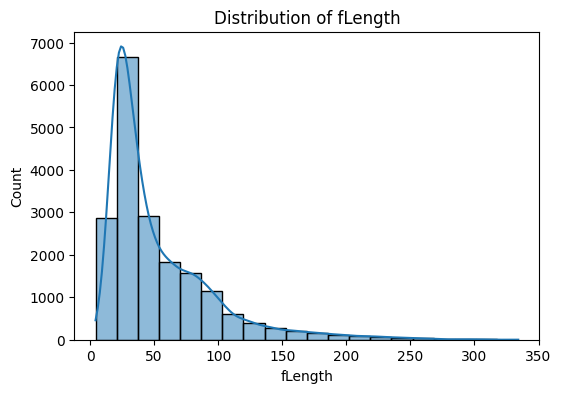

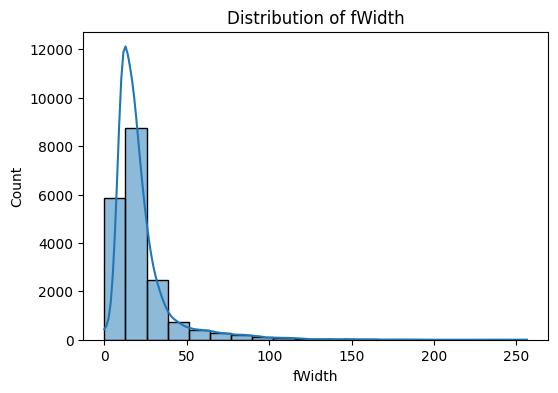

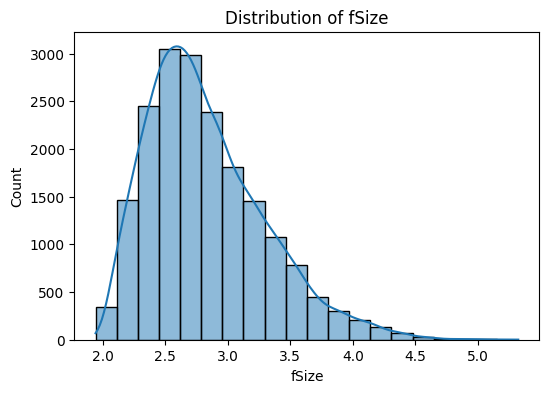

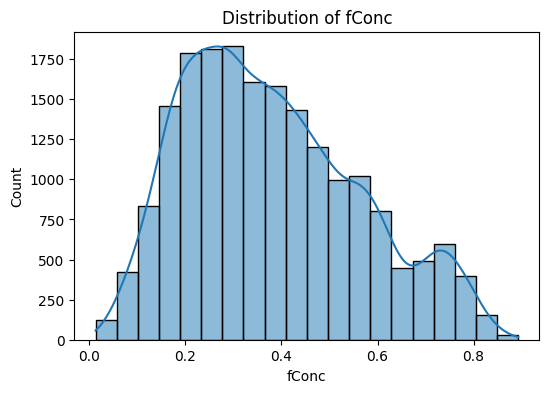

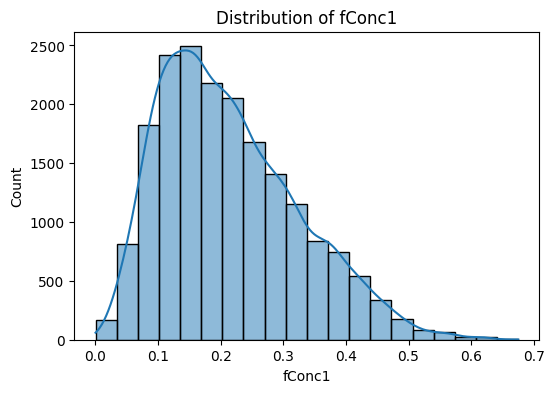

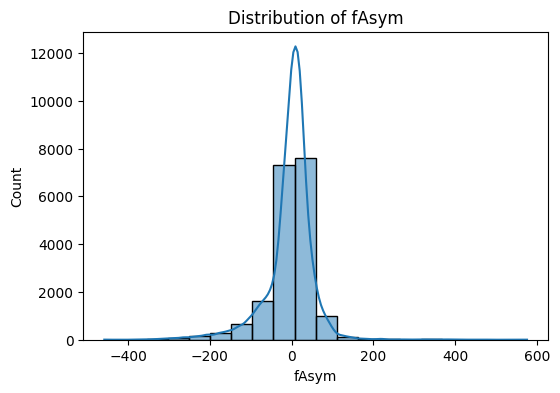

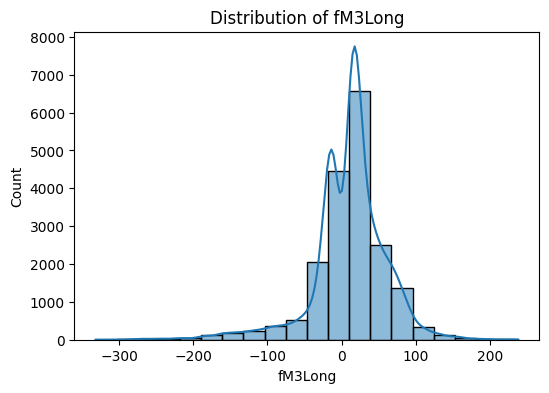

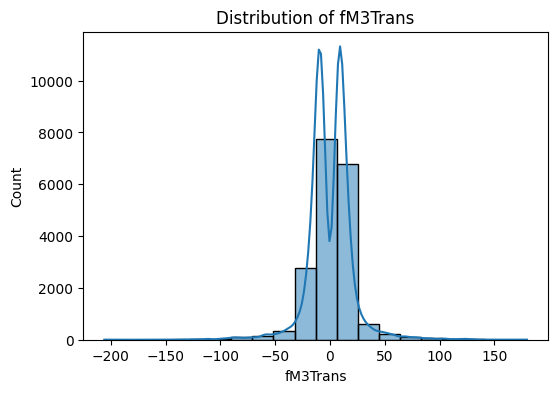

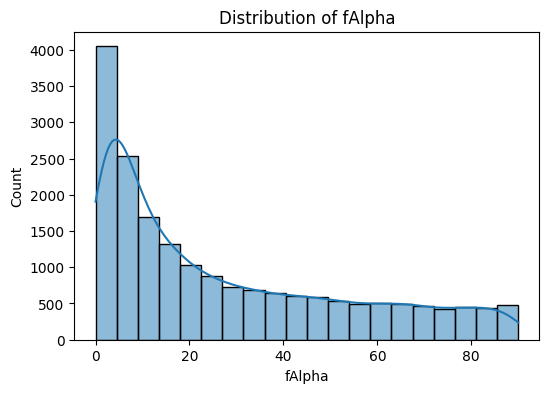

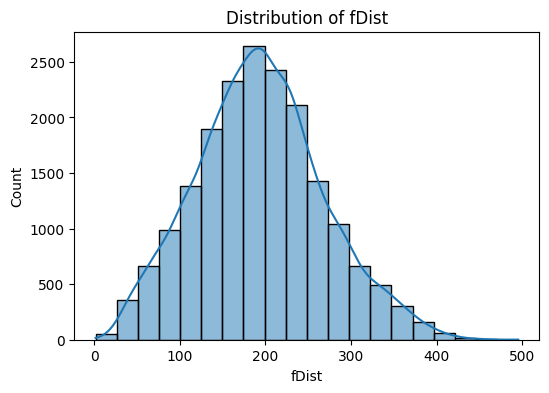

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

val = len(df.columns)
for i in range(0, val-1):
    col = df.columns[i]  # get column name by index
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, edgecolor='black', bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()



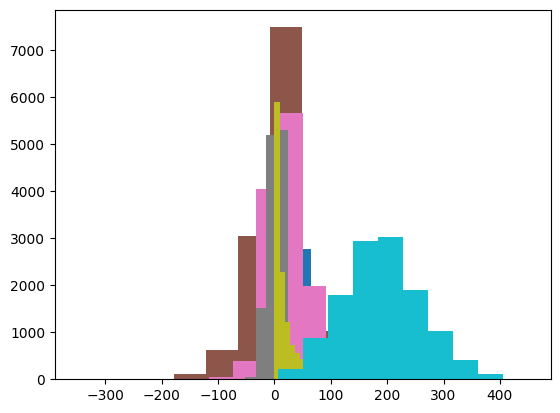

In [35]:
for label in columns[:-1]:
    plt.hist(df[df['Class']==1][label])

In [36]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X= df.drop('Class', axis= 1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, n_jobs=1, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

clsf = classification_report(y_test, y_pred)





In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)

knn_clsf   = classification_report(y_test, knn_pred)
print(knn_clsf)

              precision    recall  f1-score   support

           0       0.81      0.66      0.73      1338
           1       0.83      0.92      0.87      2466

    accuracy                           0.83      3804
   macro avg       0.82      0.79      0.80      3804
weighted avg       0.83      0.83      0.82      3804



In [43]:
import pickle
pickle.dump(knn, open('Knn_model.pkl', 'wb'))

In [44]:
model = pickle.load(open('knn_model.pkl', 'rb'))

## Other models


In [167]:
from sklearn.svm import SVC
model_svc = SVC(kernel='linear',C=1,  random_state=42)
model_svc.fit(X_train_scaled, y_train)

svc_pred = model_svc.predict(X_test_scaled)

svc_clfs = classification_report(y_test, svc_pred)
print(svc_clfs)

              precision    recall  f1-score   support

           0       0.75      0.57      0.64      1338
           1       0.79      0.89      0.84      2466

    accuracy                           0.78      3804
   macro avg       0.77      0.73      0.74      3804
weighted avg       0.78      0.78      0.77      3804



In [173]:
from sklearn.linear_model import LogisticRegression
logReg =  LogisticRegression(n_jobs=1, class_weight='balanced')

logReg.fit(X_train_scaled, y_train)
logReg_pred = logReg.predict(X_test_scaled)

logr_clfr = classification_report(y_test, logReg_pred)

print(logr_clfr)

              precision    recall  f1-score   support

           0       0.68      0.71      0.70      1338
           1       0.84      0.81      0.83      2466

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



In [164]:
print(svc_clfs)

              precision    recall  f1-score   support

           0       0.69      0.70      0.69      1338
           1       0.83      0.83      0.83      2466

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



<Axes: >

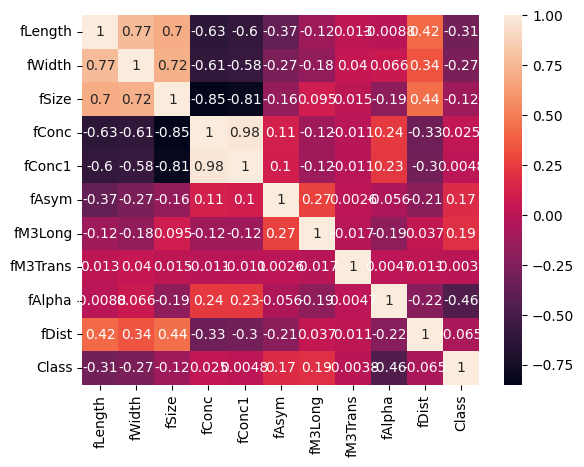

In [182]:
sns.heatmap(df.corr(), annot= True)